In [ ]:
# Cell 1: Imports
import sys
from pathlib import Path

project_root = Path().resolve().parent
sys.path.insert(0, str(project_root))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.data.data_loader import DataLoader, load_sample_data
from src.data.data_preprocessing import DataPreprocessor
from src.features.feature_builder import FeatureBuilder
from src.utils.helpers import setup_logging

setup_logging(log_level="INFO")
%matplotlib inline

print("Imports completed!")

Imports completed!


In [2]:
# Cell 2: Load Data
data_loader = DataLoader()
try:
    df = data_loader.load_csv()
except FileNotFoundError:
    df = load_sample_data()

print(f"Original Shape: {df.shape}")
df.head()

2025-11-27 15:19:16 | INFO     | config_loader:__init__:47 - Configuration loaded from D:\practice-1\src\config\config.yaml
2025-11-27 15:19:16 | INFO     | data_loader:__init__:62 - DataLoader initialized
2025-11-27 15:19:16 | INFO     | data_loader:load_sample_data:333 - Created sample data with 10 rows


Original Shape: (10, 11)


,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,2014,450000,145000,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,2016,650000,85000,Petrol,Dealer,Manual,Second Owner,18.2 kmpl,1497 CC,117 bhp,5.0
2,2018,850000,45000,Petrol,Individual,Automatic,First Owner,16.5 kmpl,1998 CC,188 bhp,5.0
3,2017,720000,67000,Diesel,Dealer,Manual,First Owner,21.0 kmpl,1493 CC,108 bhp,5.0
4,2015,380000,120000,Petrol,Individual,Manual,Second Owner,19.5 kmpl,1197 CC,81 bhp,5.0


In [3]:
# Cell 3: Data Cleaning
preprocessor = DataPreprocessor()

# Clean the data
df_clean = preprocessor.clean_data(df)
print(f"After Cleaning: {df_clean.shape}")
print(f"\nColumns after cleaning: {df_clean.columns.tolist()}")

2025-11-27 15:19:23 | INFO     | data_preprocessing:__init__:46 - DataPreprocessor initialized
2025-11-27 15:19:23 | INFO     | data_preprocessing:clean_data:59 - Starting data cleaning. Initial shape: (10, 11)
2025-11-27 15:19:23 | INFO     | data_preprocessing:_remove_outliers:236 - Removed 2 outlier rows (20.00%)
2025-11-27 15:19:23 | INFO     | data_preprocessing:clean_data:81 - Data cleaning completed. Final shape: (8, 11)


After Cleaning: (8, 11)

Columns after cleaning: ['year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'engine', 'max_power', 'seats', 'mileage']


In [4]:

# Cell 4: Create Basic Features
df_features = preprocessor.create_features(df_clean)
print(f"After Feature Creation: {df_features.shape}")
print(f"\nNew columns: {set(df_features.columns) - set(df_clean.columns)}")

2025-11-27 15:19:26 | INFO     | data_preprocessing:create_features:266 - Feature creation completed. New shape: (8, 13)


After Feature Creation: (8, 13)

New columns: {'selling_price_log', 'car_age'}


In [5]:
# Cell 5: Build Advanced Features
feature_builder = FeatureBuilder()
df_advanced = feature_builder.build_features(df_features)
print(f"After Advanced Features: {df_advanced.shape}")
print(f"\nAll features: {df_advanced.columns.tolist()}")

2025-11-27 15:19:29 | INFO     | feature_builder:__init__:41 - FeatureBuilder initialized
2025-11-27 15:19:29 | INFO     | feature_builder:build_features:70 - Feature building completed. Shape: (8, 28)


After Advanced Features: (8, 28)

All features: ['year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'engine', 'max_power', 'seats', 'mileage', 'car_age', 'selling_price_log', 'age_category', 'car_age_squared', 'km_driven_log', 'km_category', 'avg_yearly_km', 'power_per_cc', 'power_category', 'engine_category', 'age_km_interaction', 'efficiency_score', 'owner_rank', 'is_automatic', 'is_diesel', 'is_petrol', 'is_dealer']


In [6]:
# Cell 6: Feature Analysis
# Analyze new features
new_features = set(df_advanced.columns) - set(df.columns)
print(f"New features created: {len(new_features)}")
for feat in new_features:
    if df_advanced[feat].dtype in ['int64', 'float64']:
        print(f"\n{feat}:")
        print(df_advanced[feat].describe())

New features created: 18

is_diesel:
count    8.000000
mean     0.625000
std      0.517549
min      0.000000
25%      0.000000
50%      1.000000
75%      1.000000
max      1.000000
Name: is_diesel, dtype: float64

efficiency_score:
count     8.000000
mean     22.568125
std       8.293367
min      12.915000
25%      16.935750
50%      21.371500
75%      24.765000
max      38.076000
Name: efficiency_score, dtype: float64

car_age:
count     8.00000
mean      8.50000
std       2.44949
min       5.00000
25%       6.75000
50%       8.50000
75%      10.25000
max      12.00000
Name: car_age, dtype: float64

power_per_cc:
count    8.000000
mean     0.070429
std      0.015892
min      0.043092
25%      0.062593
50%      0.069951
75%      0.079912
max      0.094047
Name: power_per_cc, dtype: float64

is_dealer:
count    8.000000
mean     0.375000
std      0.517549
min      0.000000
25%      0.000000
50%      0.000000
75%      1.000000
max      1.000000
Name: is_dealer, dtype: float64

car_age_sq

In [7]:
# Cell 7: Correlation Analysis
correlations = feature_builder.analyze_correlations(df_advanced)

print("High Correlations (> 0.8):")
for col1, col2, corr in correlations['high_correlations'][:10]:
    print(f"  {col1} <-> {col2}: {corr:.4f}")

print("\nTop 10 Correlations with Target:")
for col, corr in correlations['target_correlations'][:10]:
    print(f"  {col}: {corr:.4f}")

2025-11-27 15:19:35 | INFO     | feature_builder:analyze_correlations:364 - Found 80 highly correlated feature pairs


High Correlations (> 0.8):
  year <-> car_age: -1.0000
  is_diesel <-> is_petrol: -1.0000
  car_age_squared <-> age_km_interaction: 0.9967
  year <-> car_age_squared: -0.9932
  car_age <-> car_age_squared: 0.9932
  year <-> km_driven: -0.9930
  km_driven <-> car_age: 0.9930
  km_driven_log <-> avg_yearly_km: 0.9928
  km_driven <-> age_km_interaction: 0.9886
  year <-> age_km_interaction: -0.9884

Top 10 Correlations with Target:
  seats: nan
  km_driven_log: -0.9803
  selling_price_log: 0.9742
  avg_yearly_km: -0.9620
  year: 0.9516
  car_age: -0.9516
  km_driven: -0.9446
  efficiency_score: 0.9273
  car_age_squared: -0.9173
  age_km_interaction: -0.9069


In [8]:
# Cell 8: Prepare for Modeling
X, y = preprocessor.prepare_features(df_advanced, fit=True)
feature_names = preprocessor.get_feature_names()

print(f"Feature matrix shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Number of features: {len(feature_names)}")

2025-11-27 15:19:38 | INFO     | data_preprocessing:prepare_features:305 - Numerical features: ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'car_age']
2025-11-27 15:19:38 | INFO     | data_preprocessing:prepare_features:306 - Categorical features: ['fuel', 'seller_type', 'transmission', 'owner']
2025-11-27 15:19:38 | INFO     | data_preprocessing:prepare_features:321 - Preprocessor fitted. Output shape: (8, 16)


Feature matrix shape: (8, 16)
Target shape: (8,)
Number of features: 16


2025-11-27 15:19:41 | INFO     | feature_builder:get_feature_importance:312 - Feature importance calculated


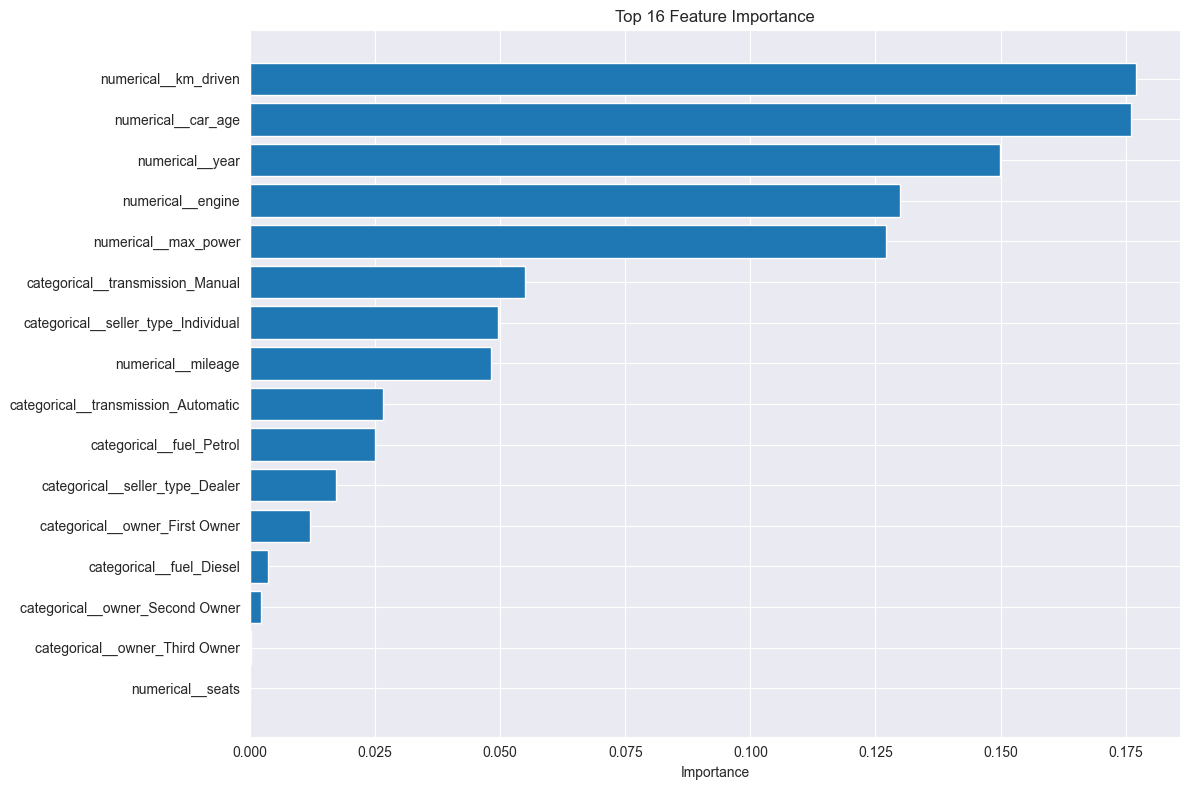


Top 10 Most Important Features:
                                feature  importance  cumulative_importance
1                  numerical__km_driven    0.177007               0.177007
6                    numerical__car_age    0.176013               0.353020
0                       numerical__year    0.149970               0.502990
3                     numerical__engine    0.129909               0.632900
4                  numerical__max_power    0.127103               0.760003
12     categorical__transmission_Manual    0.054983               0.814986
10  categorical__seller_type_Individual    0.049644               0.864630
2                    numerical__mileage    0.048208               0.912838
11  categorical__transmission_Automatic    0.026658               0.939496
8              categorical__fuel_Petrol    0.024964               0.964460


In [9]:
# Cell 9: Feature Importance
importance_df = feature_builder.get_feature_importance(X, y, feature_names)

plt.figure(figsize=(12, 8))
top_n = min(20, len(importance_df))
plt.barh(importance_df['feature'].head(top_n)[::-1], 
         importance_df['importance'].head(top_n)[::-1])
plt.xlabel('Importance')
plt.title(f'Top {top_n} Feature Importance')
plt.tight_layout()
plt.show()

print(f"\nTop 10 Most Important Features:")
print(importance_df.head(10))

In [10]:
# Cell 10: Feature Selection
X_selected, selected_features = feature_builder.select_features(
    X, y, feature_names, method='mutual_info', n_features=15
)

print(f"Selected {len(selected_features)} features:")
for feat in selected_features:
    print(f"  - {feat}")


2025-11-27 15:19:47 | INFO     | feature_builder:select_features:277 - Selected 15 features using mutual_info


Selected 15 features:
  - numerical__year
  - numerical__km_driven
  - numerical__engine
  - numerical__max_power
  - numerical__seats
  - numerical__car_age
  - categorical__fuel_Diesel
  - categorical__fuel_Petrol
  - categorical__seller_type_Dealer
  - categorical__seller_type_Individual
  - categorical__transmission_Automatic
  - categorical__transmission_Manual
  - categorical__owner_First Owner
  - categorical__owner_Second Owner
  - categorical__owner_Third Owner


In [11]:

# Cell 11: Summary
print("="*60)
print("FEATURE ENGINEERING SUMMARY")
print("="*60)
print(f"\nOriginal features: {df.shape[1]}")
print(f"Final features: {X.shape[1]}")
print(f"Selected features: {len(selected_features)}")
print(f"\nPreprocessor fitted and ready for transformation")

FEATURE ENGINEERING SUMMARY

Original features: 11
Final features: 16
Selected features: 15

Preprocessor fitted and ready for transformation
